In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
results = session.query(Measurement.prcp,Measurement.date).order_by(Measurement.date.desc()).all()

precipitation = [result[0] for result in results[:365]]
date = [result[1] for result in results[:365]]


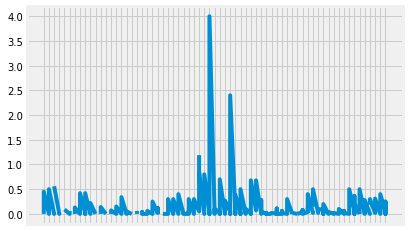

In [11]:
plt.plot(date, precipitation)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.describe()

,0
count,329.000000
mean,0.105137
std,0.296032
min,0.000000
25%,0.000000
50%,0.020000
75%,0.100000
max,4.000000


In [13]:
#STATION QUERY
#number of stations
results = session.query(Station.station).count()
print(f"There are a total of {results} stations.")


There are a total of 9 stations.


In [14]:
#most active stations
conn = engine.connect()
data = pd.read_sql("SELECT * FROM Measurement", conn)
data.head()
activity = pd.DataFrame(data['station'].value_counts())
activity = activity.rename(columns={'station': 'Activity'})
activity

,Activity
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [15]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_prior

datetime.date(2016, 8, 23)

In [16]:
# tempurature data
results = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station =='USC00519281').filter(Measurement.date < '2017-08-23').filter(Measurement.date > '2016-08-23')

date = [result[0] for result in results[:365]]
temps = [result[1] for result in results[:365]]

Text(0.5, 1.0, '')

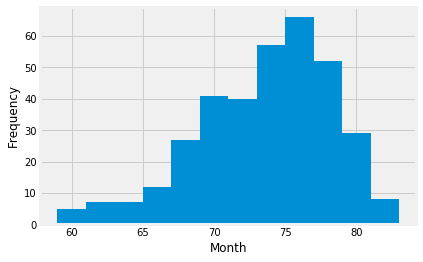

In [17]:
df = pd.DataFrame({
    'date': date,
    'temps': temps
})
df.hist(bins=12)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('')


In [19]:
session.query(Measurement.station, Station.station).limit(20).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117')]

In [21]:
select = [Measurement]
same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station).all()

for record in same_station:
    (measurement, station) = record
    print(f"Measurement station: {measurement.station}")
    print(f"Station station: {station.station}")

Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurem

Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station 

Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurem

Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurement station: USC00519397
Station station: USC00519397
Measurem

Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station 

Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station 

Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurem

Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurement station: USC00513117
Station station: USC00513117
Measurem

Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station 

Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station 

Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurement station: USC00514830
Station station: USC00514830
Measurem

Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurem

Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station station: USC00517948
Measurement station: USC00517948
Station 

Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station 

Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurem

Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurem

Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station station: USC00519523
Measurement station: USC00519523
Station 

Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station 

Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurem

Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurem

Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station station: USC00519281
Measurement station: USC00519281
Station 

Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station 

Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station station: USC00511918
Measurement station: USC00511918
Station 

Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurem

Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurem

Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurem

Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurement station: USC00516128
Station station: USC00516128
Measurem

(<sqlalchemy.ext.automap.measurement at 0x11f7b7048>,
 <sqlalchemy.ext.automap.station at 0x11f3cf390>)